# Entregable Etapa 2: Comprensión y Preparación de los datos

## Integrantes de equipo:

* Rubén Darío Castro Terrazas (A00833945) /  CDO

* Christian Jaffe Alarcón Acosta (A00832881) / Ingeniero de datos

* David Alejandro Matamoros Alvarado (A01655865) /  PM

* David Vargas Leos (A01620315) / Desarrollador Web – BI

* José Andrés Orantes Guillén (A01174130) / Ingeniero de datos

* Juan David Rivera (A01026193) / Ingeniero de datos

* Juan José Montes Raygoza (A00834630) / PM

* Pedro Fernández Merino (A01733006) / Diseñador UX – UI


### Nota importante

Este notebook es un entregable, por lo cual se trabajo mas en el analisis exploratorio de las diferentes variables que la limpieza de datos, la cual esta fue trabajada y pulida en el notebook llamado _Limpieza_modelo_

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats 
from google.colab import drive

In [ ]:
#drive.mount('/content/drive')
df = pd.read_excel("/content/Avisos M2 HM.xlsx")
#df = pd.read_excel("/content/drive/MyDrive/TC2004B/Reto/Avisos M2 HM.xlsx")

In [ ]:
df = pd.read_excel('Avisos M2 HM.xlsx') #base de datos

BadZipFile: ignored

## 1) Comprensión de los datos del negocio:

### a) Dimensión del dataset. Indica cantidad de registros y columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64719 entries, 0 to 64718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Aviso            64719 non-null  int64  
 1   Descripción      64718 non-null  object 
 2   Qué pasó?        64716 non-null  object 
 3   Por qué pasó?    64716 non-null  object 
 4   Qué se hizo?     64716 non-null  object 
 5   Parte Objeto     64717 non-null  object 
 6   Síntoma          64719 non-null  object 
 7   Texto Síntoma    24595 non-null  object 
 8   Causa            64719 non-null  object 
 9   Equipo           60402 non-null  float64
 10  Denominación     60402 non-null  object 
 11  Ubicac.técnica   64719 non-null  object 
 12  Denominación.1   64719 non-null  object 
 13  Parada           38486 non-null  object 
 14  Duración parada  64719 non-null  float64
 15  Inicio avería    64719 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 7.9+ MB


A través del código ejecutado anteriormente podemos ver como se cuenta con **64719 registros** y con **16 columnas**

### b) Describe claramente cada uno de los datos, **incluyendo su nombre, descripción, tipo (categórico/Numérico) y valores posibles que puede tomar, valores nulos.**

In [ ]:
df.head()

,Aviso,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Parte Objeto,Síntoma,Texto Síntoma,Causa,Equipo,Denominación,Ubicac.técnica,Denominación.1,Parada,Duración parada,Inicio avería
0,56855451,fuga en cilindro rotativo,REPORTA OPERADOR FUGA EN CILINDRO ROTATIVO DE ...,POR DAÑARSE VALVULA ROTATIVA DE ENRROLLADOR OT...,SE CAMBIA CILINDRO DAÑADO POR REFACCION TRABAJ...,VALVULA DISTRIBUCION,FUGAS,fuga,BAJO NIVEL ACEITE,26003529.0,MANDRIL ENROLLADOR OTE,HM-LAM-LAFR-FR03-EOTE-ENO-ELA,EMBOBINADO DE LÁMINA,NaN,0.0,3754-04-09 00:00:00
1,56942361,SE-44927-1-HH Servicio de Emergencia equ,falla plc,programacion,se efectua servicio de cia control tech en ten...,PLC,SEÑAL/INDICACIÓN/ALARMA ERRÓNEA,desprogramacion,ERROR DE PROGRAMACI,26108316.0,PLC'S TENSONIVELADO,HM-LFR-TNIV-SELE-EECO,EQUIPO ELECTRICO DE CONTROL,NaN,0.0,2021-02-21 00:00:00
2,56737243,cabledo de comunicacion de PLC,SE PIDE PONER CABLE DE COMUNICACION A TABLERO ...,POR FALTA DE COMUNICACION DE PLC A PLC,SE ADAPTARON GABINETES Y CONECTORES POR DONDE ...,OTROS,OTROS,SE PIDE PONER CABLE DE COMUNICACION A T,OTROS,23100185.0,BOTONERA SCRAP CHOPPER,HM-ACX-SLIT-SLI1-ENCH,SCRAP CHOPPER,NaN,0.0,2021-03-30 00:00:00
3,56957151,SE-48312-1-HH Servicio de Emergencia equ,FALLAS EN PLC CONTROL LOGICS,PROGRAMACION,SE CONFIGUARA LOGICA,OTROS,DESPROGRAMADO,NaN,ERROR DE PROGRAMACI,NaN,NaN,HM-LFR-TNIV-SOLD,SOLDADORA,NaN,0.0,2021-07-20 00:00:00
4,56968883,SE-48189-1-HH Servicio de Emergencia equ,falla en plc control logix,desprogramado,se modifica programacion plc,PLC,FALLA DE CONTROL,falla en plc control logix,FALLA DE COMUNICACI,26108316.0,PLC'S TENSONIVELADO,HM-LFR-TNIV-SELE-EECO,EQUIPO ELECTRICO DE CONTROL,NaN,0.0,2021-07-26 00:00:00


Ya se mencionó la existencia de un total de 16 columnas y la siguiente es la descripción de cada una:

*   **Aviso**: Esta columna muestra el número de aviso de cada registro, y por eso mismo tiene valores numéricos; sin embargo, la variable es categórica, pues el número de aviso no se presta a ser utilizado en operaciones. Además, no cuenta con algún valor nulo. 

*   **Descripción**: En esta columna hay una breve decripción del tipo de problema que se reporta. La variable es estrictamente cualitativa y contiene solo un valor nulo. 

*   **¿Qué pasó?**: Se decribe el problema que fue reportado. Es una variable cualitativa y contiene 3 valores nulos

*   **¿Por qué pasó?**: Se reporta qué fue lo que causo el problema en detalle. Es una columna de variable cualitativa y contiene tres valores nulos. 

*   **¿Qué se hizo?**: Se reporta cuáles fueron las acciones tomadas para terminar el problema. Es una variable cualitativa y contiene tres valores nulos. 

*   **Parte Objeto**:Se encuentra la parte del objeto que se puso para reparar el problema. Variable cualitativa con dos entradas nulas.  

*   **Síntoma**: Es una versión simplificada general de lo que pasó. Una variable cualitativa que no contiene entradas nulas y donde los síntomas se encuentran bien clasificados. 

*   **Texto Síntoma**: Se explica el sintoma con entrada libre de texto, por lo que se trata de una variable cualitativa. Contiene 40124 valores nulos.

*   **Causa**: Se reporta la causa del problema con entradas de texto clasificadas, por lo que también se trata de una variable cualitativa. Contiene 0 valores nulos. 

*   **Equipo**: ID del equipo que tuvo la falla. Es un valor numérico pero es una variable cualitativa. Contiene 4317 valors nulos. 

*   **Denomación**: Se categoriza el problema que se arregla por el equipo. Variable de entrada de texto: cualitativa. Contiene 4317 valors nulos. 

*   **Ubicac. Técnica**: Es la ubicación de dónde estuvo el problema. Variable de entrada de texto: cualitativa. Sin valores nulos. 

*   **Denominación.1**: Es una subcategoría de la denomincaión. Variable de entrada de texto: cualitativa. Sin valores nulos. 

*   **Parada**: En esta columna todas las casillas estan vacias o son NAN. Contiene 26233 valores nulos. 

*   **Duración parada**: Tiempo de duración de la problematica. Valores númericos representando una variable cuantitativa con ningún valor nulo. 

*   **Inicio avería**: Fecha de inicio del problema. No contiene ningún valor nulo. 




### c) Exploración de datos:

#### 1) Calcula medidas estadísticas 


> Variables cuantitativas:

*   Medidas de tendencia central:promedio, media, mediana y moda de los datos.
* Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.

Es importante mencionar que en la base de datos que nos fue proporcionada solo podemos encontrar 3 variables de tipo numérica, y al analizarlos con un poco de atención solo hay una que verdaderamente es numérica, pues las variables "Equipo" y "Aviso", son identificadores. Por lo anterior la única variable numérica que puede ser analizada es "Duración parada".

In [ ]:
df.describe()

,Aviso,Equipo,Duración parada
count,6.471900e+04,6.040200e+04,64719.000000
mean,5.662129e+07,2.547081e+07,3.169491
std,3.028009e+05,1.496488e+06,142.704152
min,5.610395e+07,2.100000e+07,0.000000
25%,5.635176e+07,2.600360e+07,0.000000
50%,5.661719e+07,2.601152e+07,0.060000
75%,5.688478e+07,2.610640e+07,0.150000
max,5.714378e+07,4.600107e+07,6991.500000


La tabla a continuación solo toma en cuenta la variable para la que tiene sentido sacar los momentos y cuartiles. 

In [ ]:
#Mediana, Moda, varianza, sesgo, curtosis, máximo y mínimo. 
from scipy.stats import skew, kurtosis
from statistics import mode, multimode
tot = {'Duración parada (seg.)' : [np.median(df['Duración parada']), mode(df['Duración parada']), np.var(df['Duración parada']), 
                            skew(df['Duración parada'], False), kurtosis(df['Duración parada'], False), max(df['Duración parada']), min(df['Duración parada'])]}
tot = pd.DataFrame(data=tot)
tot.rename({0: "Mediana", 1: "Moda", 2: "Varianza", 3: "Sesgo", 4: "Curtosis", 5: "Max", 6: "Min"}, axis=0, inplace=True)
tot

,Duración parada (seg.)
Mediana,0.060000
Moda,0.000000
Varianza,20364.160398
Sesgo,48.049480
Curtosis,2307.236879
Max,6991.500000
Min,0.000000


> Variables cualitativas:

*   Tabla de distribución de frecuencia




array([[<AxesSubplot:title={'center':'Aviso'}>,
        <AxesSubplot:title={'center':'Equipo'}>],
       [<AxesSubplot:title={'center':'Duración parada'}>, <AxesSubplot:>]],
      dtype=object)

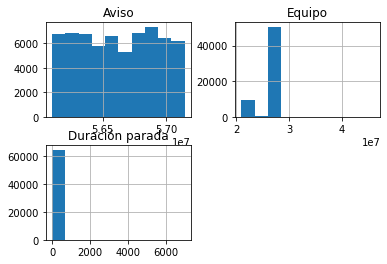

In [ ]:
df.hist()

##### Variable *Qué pasó?*

Para esta variable se crea una tabla y gráfico de frecuencia. Al ser una variable cualitativa, se utiliza el count vectorizer para encontrar qué tanto se repite una palabra y, entonces, poder encontrar las frecuencias en esta variable. 
Además, se quitan las palabras más encontradas que no aportan significado, como las preposiciones y los artículos. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from plotnine import *

In [ ]:
cv = CountVectorizer(lowercase = True, max_features = 30, max_df = 0.0885, min_df = 3, stop_words=["el", "de", "del", "la", "para", "por", "al", "con"])
## stop_words = ["de", "se", "no", "en", "reportan", "que", "el", "reporta"]
## max_features=20
x = df['Qué pasó?'].values.astype(str)
x = cv.fit_transform(x)
v = x.toarray()
colnames = cv.get_feature_names_out()
cuenta = pd.DataFrame(data = v, columns = colnames)
colnames = pd.Series(colnames)
s = pd.DataFrame(cuenta.sum())
s = s.rename(columns = {s.columns[0] : "timesFound"})
s = pd.concat([pd.DataFrame(colnames), s.reset_index(drop=True)], axis=1)
s = s.rename(columns = {s.columns[0] : "Palabra"})
s.sort_values("timesFound", ascending = False)

,Palabra,timesFound
12,falla,5725
22,operador,5568
17,linea,3426
29,vinculos,3248
19,molino,3236
8,carro,2535
13,fuga,2204
9,coche,2193
24,rodillo,2125
2,base,2108


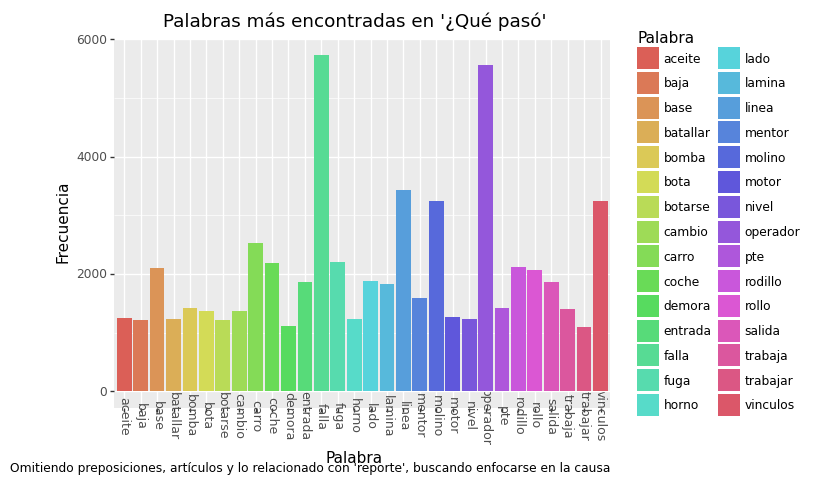

<ggplot: (8780230054732)>

In [ ]:
(ggplot(s, aes(x = "Palabra", y = "timesFound")) +
  geom_bar(stat = "identity") +
  aes(fill = "Palabra") +
  labs(
      x = "Palabra", 
      y = "Frecuencia", 
      title = "Palabras más encontradas en '¿Qué pasó'", 
      caption = "Omitiendo preposiciones, artículos y lo relacionado con 'reporte', buscando enfocarse en la causa") +
  #theme(axis_text_x = element_blank()) +
  theme(axis_text_x = element_text(angle = 270, size = 9, hjust = 0.5, vjust = 0.7)))

In [ ]:
#!pip install string_grouper

In [ ]:
#from string_grouper import group_similar_strings
#group_similar_strings(["word"])

##### Variable *Síntoma*

In [ ]:
len(df.groupby("Síntoma")["Aviso"])

51

Observamos que hay **51 sintomas distintos**

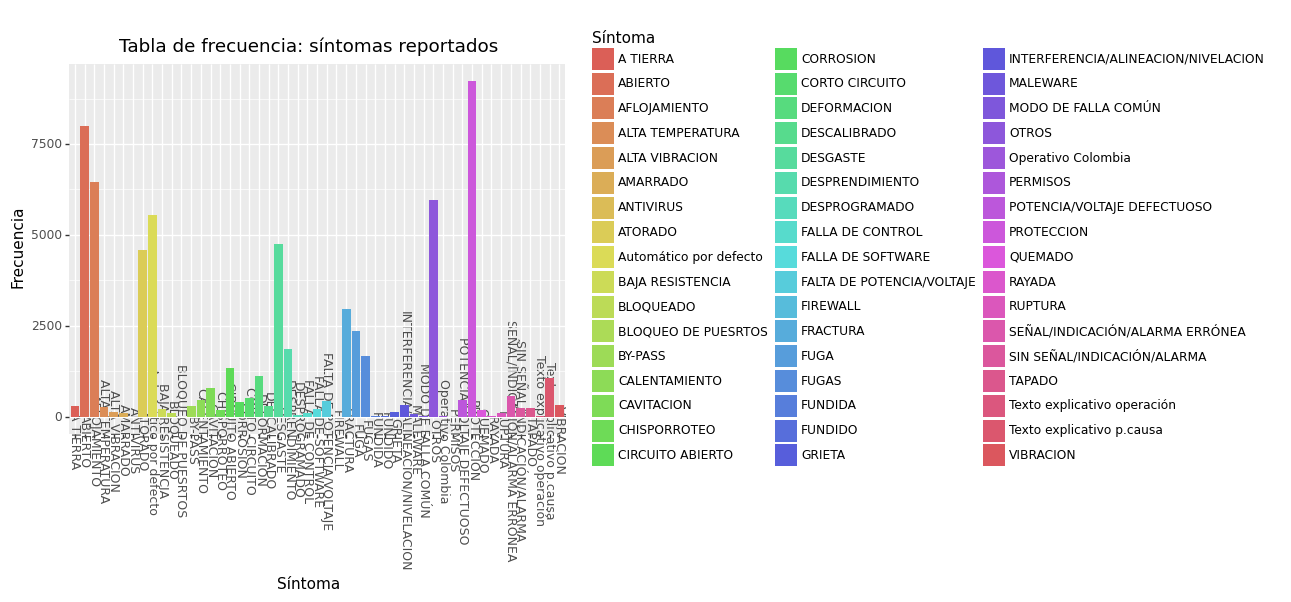

<ggplot: (8780230425875)>

In [ ]:
sint = (df 
  .groupby(["Síntoma", "Causa"])
  .agg(frequency=("Síntoma", "count"))
  .reset_index())

# sint = sint.set_index("frequency", inplace = True)
# print(sint)
# sint = sint.sort_values("frequency", inplace = True)
# print(sint)

(ggplot(sint, aes(x = "Síntoma", y = "frequency")) +
  geom_bar(stat = "identity") +
  aes(fill = "Síntoma") +
  labs(
      x = "Síntoma", 
      y = "Frecuencia", 
      title = "Tabla de frecuencia: síntomas reportados") +
  #theme(axis_text_x = element_blank()))
  theme(axis_text_x = element_text(angle = 270, size = 9, hjust = -1, vjust = 0.7)))
  # coord_flip())

##### Variable *Causa*

In [ ]:
len(df.groupby("Causa")["Aviso"])

60

Observamos que hay **60 causas distintas**

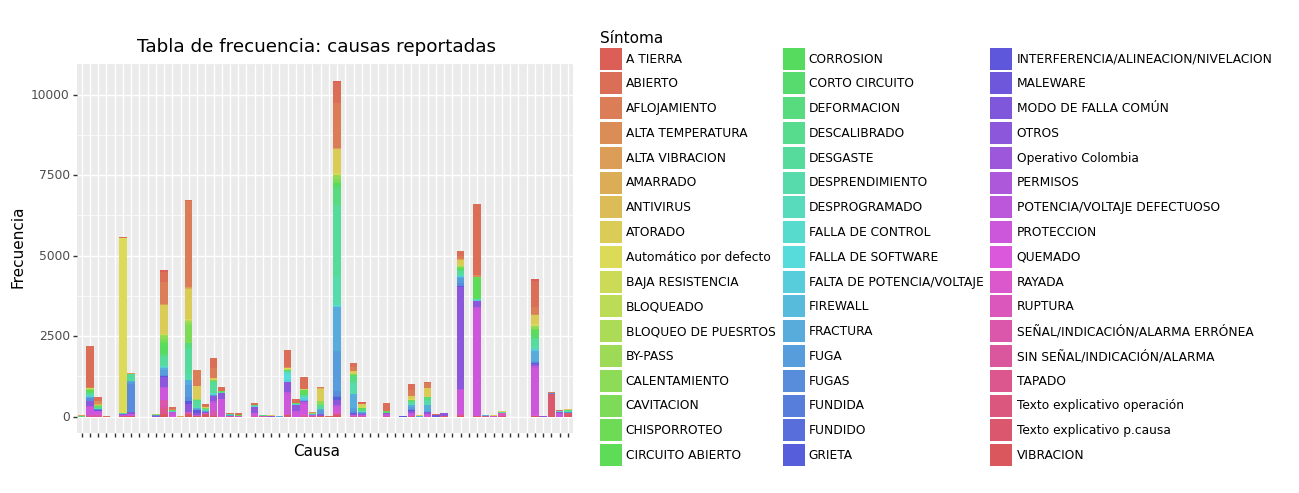

<ggplot: (8780230455643)>

In [ ]:
sint = (df 
  .groupby(["Síntoma", "Causa"])
  .agg(frequency=("Síntoma", "count"))
  .reset_index())

# sint = sint.set_index("frequency", inplace = True)
# print(sint)
# sint = sint.sort_values("frequency", inplace = True)
# print(sint)
(ggplot(sint, aes(x = "Causa", y = "frequency")) +
  geom_bar(stat = "identity") +
  aes(fill = "Síntoma") +
  labs(
      x = "Causa", 
      y = "Frecuencia", 
      title = "Tabla de frecuencia: causas reportadas") +
  theme(axis_text_x = element_blank()))
  #theme(axis_text_x = element_text(angle = 270, size = 9, hjust = 0.5, vjust = 1)))
  # coord_flip())

In [ ]:
print(cuenta.shape) 
df.shape
print(572500/64719)

(64719, 30)
8.845933960660702



*   Moda



In [ ]:
#pd.Series(df[["Parte Objeto"]].values.flatten()).mode()[0]
df.mode().iloc[0]

Aviso                                        56103947
Descripción                          ATORON OPERATIVO
Qué pasó?                                    VINCULOS
Por qué pasó?                                VINCULOS
Qué se hizo?                                 VINCULOS
Parte Objeto                   Automático por defecto
Síntoma                                    PROTECCION
Texto Síntoma                          HORNO DEMORADO
Causa                                          FATIGA
Equipo                                     26009610.0
Denominación       MENTOR # 2 TRANSP ROLLOS - 15HP CA
Ubicac.técnica                  HM-SER-TACE-EMOV-LCOM
Denominación.1                            LOCOMOTORAS
Parada                                              X
Duración parada                                   0.0
Inicio avería                     2021-02-07 00:00:00
Name: 0, dtype: object

En la parte de arriba se encuentra la moda de cada columna que hay en el dataframe. Aunque se tiene que mencionar que el número de aviso no se repite ni una vez, por lo que la función devolvió la primera entrada. 

#### 2) Explora los datos usando herramientas de visualización


> Variables cuantitativas:
* Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots
* Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
* Análisis de correlación  de los datos, mapa de color

In [ ]:
df_DP = df['Duración parada']  #DataFrame únicamente con la columna 'Duración parada'
df_DP.describe()

count    64719.000000
mean         3.169491
std        142.704152
min          0.000000
25%          0.000000
50%          0.060000
75%          0.150000
max       6991.500000
Name: Duración parada, dtype: float64

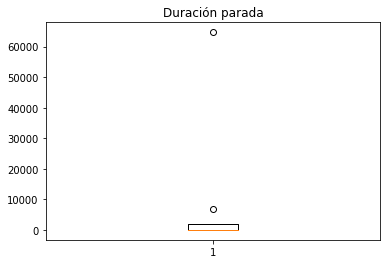

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_DP.describe())
plt.title("Duración parada")
plt.show()

In [ ]:
pd.value_counts(df_DP)

0.00     26277
0.06      3119
0.07      2825
0.05      2791
0.04      2444
         ...  
5.30         1
6.88         1
4.15         1
23.64        1
3.89         1
Name: Duración parada, Length: 565, dtype: int64

(array([6.4691e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8000e+01]),
 array([   0.  ,  699.15, 1398.3 , 2097.45, 2796.6 , 3495.75, 4194.9 ,
        4894.05, 5593.2 , 6292.35, 6991.5 ]),
 <BarContainer object of 10 artists>)

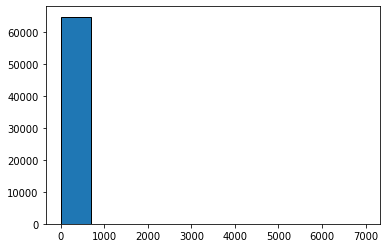

In [ ]:
arr = df['Duración parada'].to_numpy()
#plt.hist(pd.value_counts(df_DP), ec= "black")

plt.hist(arr, bins = None , ec= "black")
#plt.show()


In [ ]:
frecuencias, extremos = np.histogram(df_DP, bins =10, range=(0,7000))


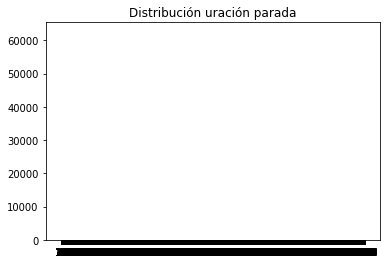

In [ ]:
import matplotlib.pyplot as plt
intervalos = range(0, 7000) #calculamos los extremos de los intervalos

plt.hist(x=df_DP, bins= intervalos, rwidth=0.85)
plt.title('Distribución uración parada')
#plt.xlabel('Edades')
#plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show()

In [ ]:
#import seaborn as sb
#sb.displot(df_DP, kde=True) #creamos el gráfico en Seaborn
#plt.show()

In [ ]:
#df_DP.transpose()

In [ ]:
import scipy.stats as sp 

In [ ]:
# Asimetría de Fisher
Asimetria=sp.skew(df_DP)
Asimetria

48.04947977150889

In [ ]:
# Curtosis
curtosis=sp.kurtosis(df_DP)
curtosis

2307.236878581312

In [ ]:
df.corr(method='pearson')

,Aviso,Equipo,Duración parada
Aviso,1.000000,0.009198,-0.018243
Equipo,0.009198,1.000000,0.008741
Duración parada,-0.018243,0.008741,1.000000


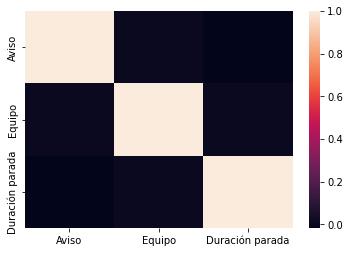

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

> Variables categóricas:
*   Distribución de los datos (diagramas de barras, diagramas de pastel)



##### d) Verifica la calidad de los datos: valores faltantes, valores de los datos, ortografía

##  2) Preparación de los datos:
### 1. Selecciona el conjunto de datos a utilizar.

#### a) Decide qué conjunto de datos se utilizará. Explica por qué se incluyeron o excluyeron ciertos datos.


Las columnas o variables que utilizaremos para nuestro analisis seran los siguientes:

* Descripción
* Qué pasó?
* Por qué pasó? 
* Causa
* Síntoma
* Qué se hizo?

In [ ]:
data = df
data = data.filter(["Descripción","Qué pasó?","Por qué pasó?","Qué se hizo?","Causa","Síntoma"],axis=1)
data.head()

,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Causa,Síntoma
0,fuga en cilindro rotativo,REPORTA OPERADOR FUGA EN CILINDRO ROTATIVO DE ...,POR DAÑARSE VALVULA ROTATIVA DE ENRROLLADOR OT...,SE CAMBIA CILINDRO DAÑADO POR REFACCION TRABAJ...,BAJO NIVEL ACEITE,FUGAS
1,SE-44927-1-HH Servicio de Emergencia equ,falla plc,programacion,se efectua servicio de cia control tech en ten...,ERROR DE PROGRAMACI,SEÑAL/INDICACIÓN/ALARMA ERRÓNEA
2,cabledo de comunicacion de PLC,SE PIDE PONER CABLE DE COMUNICACION A TABLERO ...,POR FALTA DE COMUNICACION DE PLC A PLC,SE ADAPTARON GABINETES Y CONECTORES POR DONDE ...,OTROS,OTROS
3,SE-48312-1-HH Servicio de Emergencia equ,FALLAS EN PLC CONTROL LOGICS,PROGRAMACION,SE CONFIGUARA LOGICA,ERROR DE PROGRAMACI,DESPROGRAMADO
4,SE-48189-1-HH Servicio de Emergencia equ,falla en plc control logix,desprogramado,se modifica programacion plc,FALLA DE COMUNICACI,FALLA DE CONTROL


#### b) Identifica columna objetivo


La **columna objetivo** sera definida en los otros entregables, ya que se necesita ver como quedara despues de la limpieza. Sin embargo, de primera instancia para ser que la columna _Descripcion_, _Que paso?_ y _Que se hizo_ pueden brindar informacion detallada sobre cada Aviso o registro para el modelo de Clustering que se implementara.


### 2.- Limpieza de datos

####a) Elimina duplicados


No podemos hacer una limpieza de duplicados antes de hacer una limpieza produnda de los datos, ya que cada registro se debe considerar como evento independiente y solo se podra hacerlo al normalizar los datos (Lematizacion).

####b) Corrige valores erróneos.

Los valores erroneos se trabajaran en los siguientes chunks de codigo al eliminar signos de puntuacion y al normarlizar los datos con una libreria de NLP llamada spaCy, que contiene una gran variedad de palabras provenientes del diccionario de la lengua Espanola


####c) Maneja valores faltantes.

Veremos que tan frecuente son los valores faltantes dentro de nuestras variables seleccionadas y aplicaremos la limpieza adecuada.

In [ ]:
data.isna().sum()

Descripción      1
Qué pasó?        3
Por qué pasó?    3
Qué se hizo?     3
Causa            0
Síntoma          0
dtype: int64

Debido a que los valores faltantes son insignificantes, podemos tomar la decision de **eliminarlos**

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

Descripción      0
Qué pasó?        0
Por qué pasó?    0
Qué se hizo?     0
Causa            0
Síntoma          0
dtype: int64

Vemos que las las variables _Causa_ y _Sintoma_ son de una palabra solamente, por lo que podemos hacer un primer paso de estandarizado al quitar las mayusculas.



In [ ]:
for i in range(0,data.shape[0]):
  data.iloc[i,4] = data.iloc[i,4].lower()
  data.iloc[i,5] = data.iloc[i,5].lower()

data.head()

,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Causa,Síntoma
0,fuga en cilindro rotativo,REPORTA OPERADOR FUGA EN CILINDRO ROTATIVO DE ...,POR DAÑARSE VALVULA ROTATIVA DE ENRROLLADOR OT...,SE CAMBIA CILINDRO DAÑADO POR REFACCION TRABAJ...,bajo nivel aceite,fugas
1,SE-44927-1-HH Servicio de Emergencia equ,falla plc,programacion,se efectua servicio de cia control tech en ten...,error de programaci,señal/indicación/alarma errónea
2,cabledo de comunicacion de PLC,SE PIDE PONER CABLE DE COMUNICACION A TABLERO ...,POR FALTA DE COMUNICACION DE PLC A PLC,SE ADAPTARON GABINETES Y CONECTORES POR DONDE ...,otros,otros
3,SE-48312-1-HH Servicio de Emergencia equ,FALLAS EN PLC CONTROL LOGICS,PROGRAMACION,SE CONFIGUARA LOGICA,error de programaci,desprogramado
4,SE-48189-1-HH Servicio de Emergencia equ,falla en plc control logix,desprogramado,se modifica programacion plc,falla de comunicaci,falla de control



####d) Maneja datos categóricos: Transforma a datos numéricos si es necesario.

Vamos a hacer un proceso que se conoce en la rama de NLP como _tokenization_, la cual consiste en descomponer una cadena de texto en pequenos subgrupos para poder crear un analisis del significado de un oracion. 

#### 1. Puntuacion

In [ ]:
import string
string.punctuation
def eliminarPuntuacion(text):
  no_punct = [words for words in text if words not in string.punctuation]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct

#### 2. Tokenization

In [ ]:
import re

def tokenize(text):
  split = re.split("\W+",text)
  return split

#### 2. Eliminar palabras que no aporten valor

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stops = set(stopwords.words('spanish'))
def eliminarPalabras(text):
  text=[word for word in text if word not in stops]
  return text

### Normalizar y eliminar tildes

In [ ]:
#vamos a aplicar esta limpieza a las columnas designadas

def dataCleansing(dataFrame):
  new_df = dataFrame
  for i in range(0,dataFrame.shape[1]):
    new_df.iloc[:,i] = new_df.iloc[:,i].apply(lambda x: eliminarPuntuacion(x))
    new_df.iloc[:,i] = new_df.iloc[:,i].apply(lambda x: tokenize(x.lower()))
    new_df.iloc[:,i] = new_df.iloc[:,i].apply(lambda x: eliminarPalabras(x))
  return new_df


newData = dataCleansing(data.iloc[:,0:4])
newData["Síntoma"] = data["Síntoma"]
newData["Causa"] = data["Causa"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-89-a84fe192685b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Concatenar las palabras

In [ ]:
def concatenateItems(dataFrame):
  for i in range(0,dataFrame.shape[1]):
    for j in range(0,dataFrame.shape[0]):
      dataFrame.iloc[j,i] = " ".join(dataFrame.iloc[j,i]) 
  return dataFrame

newData.iloc[:,0:4] = concatenateItems(newData.iloc[:,0:4])

### Eliminar tildes para normalizar Tokens

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.7 MB/s eta 0:00:00


#### 4. Lematizar las palabras y eliminar tildes

Usaremos la liberia de spaCy para lematizar y normalizar los textos, lo cual signfica que tomaremos la palabra raiz de cada palabra o Token

In [ ]:
import spacy
spacy.cli.download("es_core_news_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
from unidecode import unidecode

def lemmatizeWords(column):
    nlp = spacy.load('es_core_news_sm') #libreria con el lenguaje en espanol
    nlp.max_length = 100000000 
    words = ""
    for i in range(0,len(column)):
        words += column[i] + " | "
    
    words = unidecode(words) #eliminar Tildes
    doc = nlp(words)
    lemmas =  [word.lemma_ for word in doc] #obtenemos las palabras raiz de cada palabra
    totalWords = ""
    for word in lemmas:
        totalWords +=  word + " "

    return totalWords.split(" | ")

In [ ]:
descripcion_col = lemmatizeWords(newData["Descripción"].tolist())
quepaso_col = lemmatizeWords(newData["Qué pasó?"].tolist())
PorQuePaso_col = lemmatizeWords(newData["Por qué pasó?"].tolist())
queSeHizo = lemmatizeWords(newData["Qué se hizo?"].tolist())
causa_col = lemmatizeWords(newData["Causa"].tolist())
sint_col = lemmatizeWords(newData["Síntoma"].tolist())


In [ ]:
#SOLO CORRER UNA VEZ
quepaso_col.pop(-1)
PorQuePaso_col.pop(-1)
queSeHizo.pop(-1)
causa_col.pop(-1)
sint_col.pop(-1)
"""
print(len(descripcion_col),len(newData["Descripción"]))
print(len(quepaso_col),len(newData["Qué pasó?"]))
print(len(PorQuePaso_col),len(newData["Por qué pasó?"]))
print(len(queSeHizo),len(newData["Qué se hizo?"]))
print(len(causa_col),len(newData["Causa"]))
print(len(sint_col),len(newData["Síntoma"]))
"""

'\nprint(len(descripcion_col),len(newData["Descripción"]))\nprint(len(quepaso_col),len(newData["Qué pasó?"]))\nprint(len(PorQuePaso_col),len(newData["Por qué pasó?"]))\nprint(len(queSeHizo),len(newData["Qué se hizo?"]))\nprint(len(causa_col),len(newData["Causa"]))\nprint(len(sint_col),len(newData["Síntoma"]))\n'

In [ ]:
newData["Descripción"] = descripcion_col 
newData["Qué pasó?"] = quepaso_col
newData["Por qué pasó?"]= PorQuePaso_col
newData["Qué se hizo?"] = queSeHizo
newData["Causa"] =  causa_col
newData["Síntoma"] =  sint_col

In [ ]:
newData.head(4)

,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Síntoma,Causa
0,fuga cilindro rotativo,reportar operador fuga cilindro rotativo enrro...,danar él valvula rotativo enrrollador ote fatiga,cambiar cilindro danado refaccion trabajar ok ...,fuga,bajo nivel aceite
1,se449271hh servicio emergenciar equ,fallar plc,programacion,efectuar servicio cio control tech tensonivelado,senal / indicacion / alarma erronear,error de programaci
2,cabledo comunicacion plc,pedir poner cable comunicacion tablero plc,faltar comunicacion plc plc,adaptar gabinet conector pasar cable,otro,otro
3,se483121hh servicio emergenciar equ,falla plc control logics,programacion,configuar logico,desprogramado,error de programaci


Como podemos observar, la informacion se encuentra estandarizada y procesada. La unica cuestion a tomar en cuenta son los valores alfa numericos (numeros), pero estos mismos no se eliminaron ya que pueden ser util para identificar nuevas clases en el futuro. Otra cuestion a tomar en cuenta son las faltas de ortografia, las cuales se trataron de utilizar varias librerias pero desafortunadamente, muchas no cuentan con el soporte a la lengua de espanol.


####e) Maneja adecuadamente los valores atípicos (outliers) que encuentres en el dataset.



In [ ]:
#Traducir cada elemento del DataFrame resulta una tarea muy pesada para los servidores debido al gran numero de peteciones realizados. Sin embargo, veremos como podemos hacer mucho mas eficiente el proceso
"""
def translatingToEnglish(dataFrame):
  translator= Translator(from_lang="es",to_lang="en")
  for i in range(0,dataFrame.shape[1]):
    for j in range(0,dataFrame.shape[0]):
      wordList = dataFrame.iloc[j,i]
      new_wordList = []
      for word in wordList:
        new_wordList.append(translator.translate(word))
      dataFrame.iloc[j,i] = new_wordList
  return dataFrame
newData_en = translatingToEnglish(newData.iloc[:,0:1])
"""

# newData.iloc[:,5] = newData.iloc[:,5].apply(lambda x: ts.translate_text(x,from_language='es', to_language='en'))

'\ndef translatingToEnglish(dataFrame):\n  translator= Translator(from_lang="es",to_lang="en")\n  for i in range(0,dataFrame.shape[1]):\n    for j in range(0,dataFrame.shape[0]):\n      wordList = dataFrame.iloc[j,i]\n      new_wordList = []\n      for word in wordList:\n        new_wordList.append(translator.translate(word))\n      dataFrame.iloc[j,i] = new_wordList\n  return dataFrame\nnewData_en = translatingToEnglish(newData.iloc[:,0:1])\n'

Para ser que el tiempo de espera es muy elevado para hacer la traduccion de cada elemento


### 3.- Transformación de Datos:


Veremos que podemos hacer con la variable _Síntoma_ y _Causa_, y exploraremos cuantos grupos existen de este mismo

In [ ]:
sint = newData.groupby("Síntoma").size().sort_values(ascending=True)
sint_df = pd.DataFrame({"Sintoma":sint.index,"Frecuencia":sint.values})
for i in range(0,sint_df.shape[0]):
  sint_df.iloc[i,0] = sint_df.iloc[i,0].lower()#Normalizamos las variables
sint_df

,Sintoma,Frecuencia
0,antivirus,1
1,firewall,1
2,permiso,2
3,bloqueo de puesrto,2
4,fundida,3
...,...,...
57,aflojamientir,4771
58,automatico por defecto,5536
59,otro,5948
60,abierto,8008


In [ ]:
causa = newData.groupby("Causa").size().sort_values(ascending=True)
causa_df = pd.DataFrame({"Causa":causa.index,"Frecuencia":causa.values})
for i in range(0,causa_df.shape[0]):
  causa_df.iloc[i,0] = causa_df.iloc[i,0].lower()
causa_df

,Causa,Frecuencia
0,service,1
1,servizar,1
2,distribution,1
3,instandsetzung,1
4,produktionssteuerung,1
...,...,...
70,otro,5153
71,automatico por defecto,5569
72,proteccion,6617
73,fatigar,6635


#### a) Revisa si es necesario discretizar los datos (binning)

In [ ]:
#En base a la frecuencia de cada palabra dentro de las variables de Sintoma y Causa, crearemos multiclases a partir de rangos.
sint_df["Frecuencia_grupos"] = pd.qcut(sint_df["Frecuencia"],q=4,labels=[1,2,3,4])
sint_df

,Sintoma,Frecuencia,Frecuencia_grupos
0,antivirus,1,1
1,firewall,1,1
2,permiso,2,1
3,bloqueo de puesrto,2,1
4,fundida,3,1
...,...,...,...
57,aflojamientir,4771,4
58,automatico por defecto,5536,4
59,otro,5948,4
60,abierto,8008,4


In [ ]:
#Ahora para la variable causa
causa_df["Frecuencia_grupos"] = pd.qcut(causa_df["Frecuencia"],q=4,labels=[1,2,3,4])
causa_df

,Causa,Frecuencia,Frecuencia_grupos
0,service,1,1
1,servizar,1,1
2,distribution,1,1
3,instandsetzung,1,1
4,produktionssteuerung,1,1
...,...,...,...
70,otro,5153,4
71,automatico por defecto,5569,4
72,proteccion,6617,4
73,fatigar,6635,4


In [ ]:
sintNames = sint_df["Sintoma"].tolist()
sintValues = sint_df["Frecuencia_grupos"].tolist()

sintGroups = {}

for i in range(0,len(sintNames)):
  sintGroups[sintNames[i]] =  sintValues[i]


In [ ]:
causaNames = causa_df["Causa"].tolist()
causaValues = causa_df["Frecuencia_grupos"].tolist()

causaGroups = {}

for i in range(0,len(causaNames)):
  causaGroups[causaNames[i]] =  causaValues[i]


In [ ]:
groups_sint = []
for sintoma in newData["Síntoma"]:
  if sintoma in sintGroups.keys():
    groups_sint.append(sintGroups[sintoma])

In [ ]:
groups_causa = []
for causa in newData["Causa"]:
  if causa in causaGroups.keys():
    groups_causa.append(causaGroups[causa])

In [ ]:
newData["Sintoma_grupo"] = groups_sint
newData["Causa_grupo"] = groups_causa

In [ ]:
newData.head(10)

,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Síntoma,Causa,Sintoma_grupo,Causa_grupo
0,fuga cilindro rotativo,reportar operador fuga cilindro rotativo enrro...,danar él valvula rotativo enrrollador ote fatiga,cambiar cilindro danado refaccion trabajar ok ...,fuga,bajo nivel aceite,4,4
1,se449271hh servicio emergenciar equ,fallar plc,programacion,efectuar servicio cio control tech tensonivelado,senal / indicacion / alarma erronear,error de programaci,3,3
2,cabledo comunicacion plc,pedir poner cable comunicacion tablero plc,faltar comunicacion plc plc,adaptar gabinet conector pasar cable,otro,otro,4,4
3,se483121hh servicio emergenciar equ,falla plc control logics,programacion,configuar logico,desprogramado,error de programaci,2,3
4,se481891hh servicio emergenciar equ,fallar plc control logix,desprogramado,modifico programacion plc,falla de control,falla de comunicaci,2,4
5,se481891hh servicio emergenciar equ,fallar plc contol logix,falla programacion,realizar cambio programacion plc,falla de control,falla de comunicaci,2,4
6,se484471hh servicio soporte tecnic,desarrollo logico control desaceleracion tange...,paro fin rollo,desarrollo logico control desaceleracion tange...,desprogramado,proteccion,2,4
7,se507211hh servicio emergenciar equ,falla rayo gamma,dano tarjeta,realizar logico control nuevo accionamiento le...,falla de software,fatigar,3,4
8,ajustar switch presion lc1,bota biseladora poniente,desajustir switch presion,ajusto switch dar indicación operador,desgaste,desajustir,4,4
9,falla mesa empaquetado automatico,doblar lengueta mesa emapqueatdo automatico,posibliemte perdio secuendia tanda,enderezar lenguetas,fractura,golpe,4,4



###4.- Reformatea/reestructura los datos si es necesario

In [ ]:
newData.to_excel("avisos_clean.xlsx",index=False)

## Conclusiones de Etapas CRISP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

In [ ]:
import re
import string
import pandas as pd 

In [ ]:
# expand pandas df column display width to enable easy inspection
pd.set_option('max_colwidth', 150)
# read in csv to dataframe

# visually inspect dataframe
df.head()

,Aviso,Descripción,Qué pasó?,Por qué pasó?,Qué se hizo?,Parte Objeto,Síntoma,Texto Síntoma,Causa,Equipo,Denominación,Ubicac.técnica,Denominación.1,Parada,Duración parada,Inicio avería
0,56855451,fuga en cilindro rotativo,REPORTA OPERADOR FUGA EN CILINDRO ROTATIVO DE ENRROLLADOR OTE,POR DAÑARSE VALVULA ROTATIVA DE ENRROLLADOR OTE (FATIGA),SE CAMBIA CILINDRO DAÑADO POR REFACCION TRABAJANDO OK MOLINO,VALVULA DISTRIBUCION,FUGAS,fuga,BAJO NIVEL ACEITE,26003529.0,MANDRIL ENROLLADOR OTE,HM-LAM-LAFR-FR03-EOTE-ENO-ELA,EMBOBINADO DE LÁMINA,NaN,0.0,3754-04-09 00:00:00
1,56942361,SE-44927-1-HH Servicio de Emergencia equ,falla plc,programacion,se efectua servicio de cia control tech en tensonivelado,PLC,SEÑAL/INDICACIÓN/ALARMA ERRÓNEA,desprogramacion,ERROR DE PROGRAMACI,26108316.0,PLC'S TENSONIVELADO,HM-LFR-TNIV-SELE-EECO,EQUIPO ELECTRICO DE CONTROL,NaN,0.0,2021-02-21 00:00:00
2,56737243,cabledo de comunicacion de PLC,SE PIDE PONER CABLE DE COMUNICACION A TABLERO DE PLC,POR FALTA DE COMUNICACION DE PLC A PLC,SE ADAPTARON GABINETES Y CONECTORES POR DONDE PASA EL CABLE,OTROS,OTROS,SE PIDE PONER CABLE DE COMUNICACION A T,OTROS,23100185.0,BOTONERA SCRAP CHOPPER,HM-ACX-SLIT-SLI1-ENCH,SCRAP CHOPPER,NaN,0.0,2021-03-30 00:00:00
3,56957151,SE-48312-1-HH Servicio de Emergencia equ,FALLAS EN PLC CONTROL LOGICS,PROGRAMACION,SE CONFIGUARA LOGICA,OTROS,DESPROGRAMADO,NaN,ERROR DE PROGRAMACI,NaN,NaN,HM-LFR-TNIV-SOLD,SOLDADORA,NaN,0.0,2021-07-20 00:00:00
4,56968883,SE-48189-1-HH Servicio de Emergencia equ,falla en plc control logix,desprogramado,se modifica programacion plc,PLC,FALLA DE CONTROL,falla en plc control logix,FALLA DE COMUNICACI,26108316.0,PLC'S TENSONIVELADO,HM-LFR-TNIV-SELE-EECO,EQUIPO ELECTRICO DE CONTROL,NaN,0.0,2021-07-26 00:00:00


KeyError: ignored